In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import  fashion_mnist
data = fashion_mnist.load_data()

In [19]:
(x_train, y_train), (x_test, y_test) = data

In [21]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [30]:
class_names=['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
    '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

def get_name(n):
    name=class_names[n]
    return name

In [31]:
y_train[1]
print(get_name(y_train[1]))

0 T-shirt/top


In [42]:
x_train[1].shape

(784,)

In [43]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [44]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 56)                7224      
                                                                 
 dropout_10 (Dropout)        (None, 56)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [46]:
history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/50


2023-12-09 16:43:52.703265: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1200/1200 [==============================] - 7s 5ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.7610 - val_loss: 0.4481 - val_sparse_categorical_accuracy: 0.8310
Epoch 2/50
1200/1200 [==============================] - 7s 5ms/step - loss: 0.4658 - sparse_categorical_accuracy: 0.8379 - val_loss: 0.4110 - val_sparse_categorical_accuracy: 0.8542
Epoch 3/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.4230 - sparse_categorical_accuracy: 0.8523 - val_loss: 0.3992 - val_sparse_categorical_accuracy: 0.8558
Epoch 4/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8626 - val_loss: 0.3887 - val_sparse_categorical_accuracy: 0.8615
Epoch 5/50
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3815 - sparse_categorical_accuracy: 0.8658 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8703
Epoch 6/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3642 - sparse_categoric

In [47]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3440 - sparse_categorical_accuracy: 0.8906


In [48]:
accuracy

0.8906000256538391

In [49]:
loss

0.34401950240135193

In [50]:
prediction = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [51]:
import numpy as np 
prediction_values = np.argmax(prediction, axis=1)

In [52]:
prediction_values

array([9, 2, 1, ..., 8, 1, 5])

In [56]:
z=20
y_test[z]

2

In [58]:
prediction_values[z]

2

In [59]:
print(get_name(y_test[z]))
print(get_name(prediction_values[z]))

2 Pullover
2 Pullover


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm = confusion_matrix(y_test, prediction_values)
print(cm)


[[854   2  17  26   4   1  91   0   5   0]
 [  1 976   0  19   0   0   3   0   1   0]
 [ 17   2 817  13  81   0  70   0   0   0]
 [ 19   4   5 901  48   0  18   1   4   0]
 [  1   1 109  23 814   0  49   0   3   0]
 [  0   0   0   1   0 970   0  20   0   9]
 [139   2  84  33  66   0 664   0  12   0]
 [  0   0   0   0   0   5   0 977   0  18]
 [  3   1   2   4   3   1   7   3 976   0]
 [  0   0   0   0   0   3   1  39   0 957]]


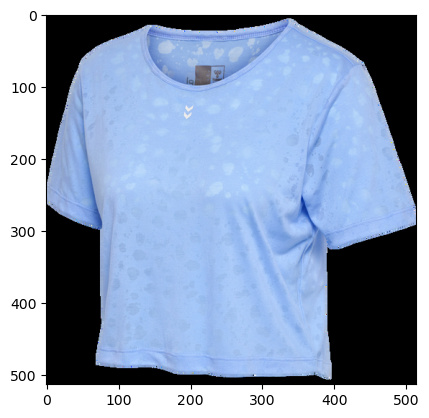

In [62]:
import cv2
real_img = cv2.imread('T-shirt.png')

import matplotlib.pyplot as plt

plt.imshow(real_img)

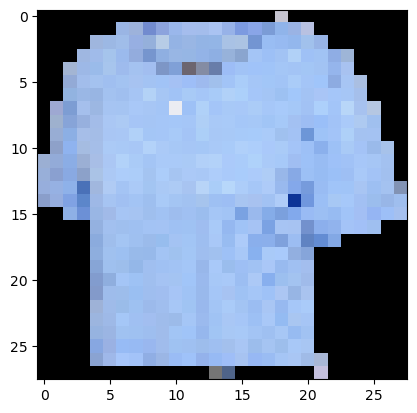

In [65]:
real_img = cv2.resize(real_img, (28,28))
plt.imshow(real_img)

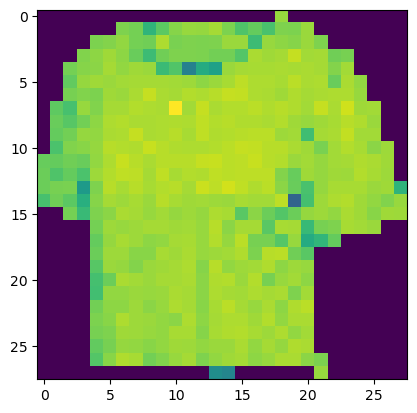

In [67]:
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2GRAY)
plt.imshow(real_img)

In [68]:
real_img.shape

(28, 28)

In [69]:
real_img=real_img.reshape(-1, 28*28)

In [71]:
real_img.shape

(1, 784)

In [72]:
real_img=real_img/255

In [73]:
model.save('model3.h5')

In [74]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model3.h5')

In [75]:
loaded_model

In [76]:
real_prediction = loaded_model.predict(real_img)

1/1 [==============================] - 0s 117ms/step


In [77]:
real_prediction

array([[6.1763883e-02, 5.8580036e-07, 1.4732921e-02, 2.7600973e-04,
        3.7695614e-03, 1.4460989e-11, 9.1938215e-01, 1.0713166e-13,
        7.4962169e-05, 9.0336419e-12]], dtype=float32)

In [78]:
real_prediction = np.argmax(real_prediction, axis=1)

In [79]:
real_prediction

array([6])

In [81]:
get_name(real_prediction[0])

'6 Shirt'